In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp, feature_selection as fs, model_selection as ms
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor,\
ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,\
GradientBoostingRegressor,VotingClassifier,VotingRegressor
from sklearn import metrics as mt
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [108]:
df1 = pd.read_csv('GTPC.csv')
df2 = pd.read_csv('PAAC.csv')
df3 = pd.read_csv('DISTANCE_PAIR.csv')
df4 = pd.read_csv('MORAN.csv')
df5 = pd.read_csv('GDPC.csv')
df6 = pd.read_csv('ACC.csv')

In [109]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df.columns = [x for x in range(df.shape[1])]
df['label'] = df[0].astype(int)
df.drop([0, 26], axis=1, inplace=True)


In [110]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [111]:
shuffle_data = shuffle(X, y, random_state=0)

X = shuffle_data[0]
y = shuffle_data[1]

In [ ]:
#df.hist(sharex=False, sharey=False, ylabelsize=1, figsize=(20,20))
#plt.show()

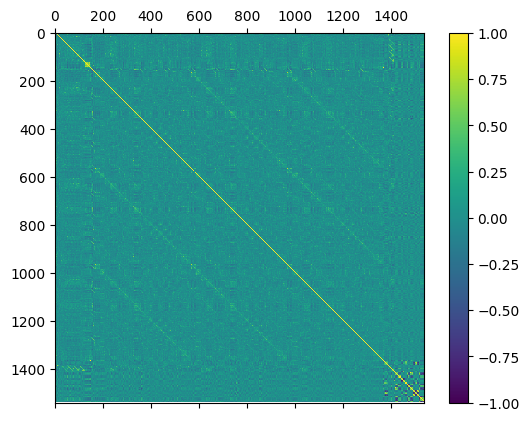

In [10]:
fig = plt.figure()

ax  = fig.add_subplot(111)

cax = ax.matshow(df.corr(), vmin=-1, vmax=1)

fig.colorbar(cax)

plt.show()

In [112]:
Xtrain, Xtest, ytrain, ytest = ms.train_test_split(X, y, test_size=0.25,
                                               random_state=0)

In [130]:
#feature selection by anova f test

fs = SelectKBest(score_func=f_classif, k='all')

#learn the relationship from training data
fs.fit(Xtrain, ytrain)

Xtrain_fs = fs.transform(Xtrain)

Xtest_fs = fs.transform(Xtest)




c:\users\yasir\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [9]:
for i in range(len(fs.scores_)):
    print('Features %d: %f ' % (i, fs.scores_[i]))

Features 0: 7.225955 
Features 1: 46.299817 
Features 2: 3.382171 
Features 3: 7.508238 
Features 4: 28.022426 
Features 5: 29.855987 
Features 6: 9.617481 
Features 7: 5.758408 
Features 8: 15.967677 
Features 9: 40.484106 
Features 10: 5.922422 
Features 11: 0.003399 
Features 12: 6.016368 
Features 13: 17.856387 
Features 14: 16.363281 
Features 15: 53.810187 
Features 16: 3.840375 
Features 17: 43.331204 
Features 18: 32.567348 
Features 19: 0.007045 
Features 20: 3.005864 
Features 21: 15.170812 
Features 22: 11.778338 
Features 23: 0.184621 
Features 24: 35.062779 
Features 25: 13.652835 
Features 26: 0.070484 
Features 27: 4.014315 
Features 28: 13.855838 
Features 29: 11.901724 
Features 30: 17.774342 
Features 31: 3.471348 
Features 32: 0.156056 
Features 33: 5.139569 
Features 34: 1.395908 
Features 35: 7.699852 
Features 36: 0.446636 
Features 37: 1.148923 
Features 38: 6.015185 
Features 39: 5.066871 
Features 40: 8.590969 
Features 41: 4.928850 
Features 42: 16.862096 
Fea

<BarContainer object of 1540 artists>

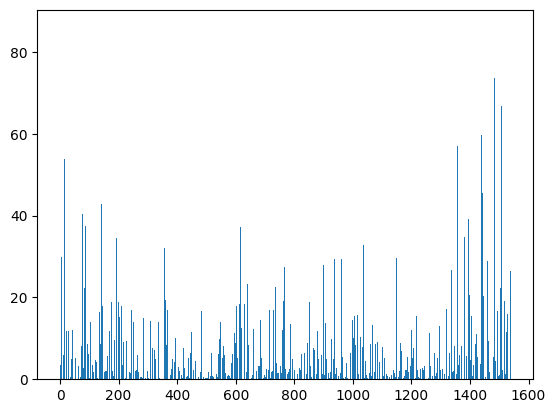

In [10]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

In [131]:
#find the number of features which are significant
len([fs.scores_[x] for x in range(len(fs.scores_)) if fs.scores_[x] > 50])

33

In [132]:
#again select the features with k=170

#feature selection by anova f test

fsa = SelectKBest(score_func=f_classif, k=33)

#learn the relationship from training data
fsa.fit(Xtrain, ytrain)

Xtrain_fs = fsa.transform(Xtrain)

Xtest_fs = fsa.transform(Xtest)





c:\users\yasir\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


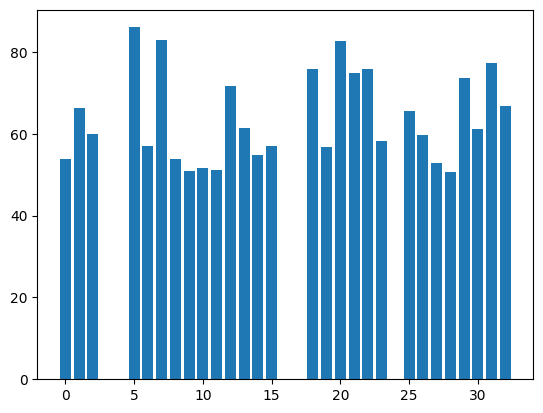

In [134]:
plt.bar([x for x in range(33)], [fsa.scores_[i] for i in range(len(fsa.scores_)) if fsa.scores_[i] > 50])
plt.show()

In [136]:
#classifications models
models = []

models.append(('LogR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='poly')))

In [137]:
results = []

names = []

for name, model in models:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model, Xtrain_fs, ytrain, cv=kfold,
                                  scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_result.mean(), cv_result.std()))

LogR: 1.000000 (0.000000)
LDA: 0.825399 (0.044750)
KNN: 1.000000 (0.000000)
DT: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


In [138]:
#use pipeline for first scaled the values then train
pipeline = []

pipeline.append((('scaledLogR'), Pipeline([('scaler',pp.StandardScaler()),
                                        ('LogR', LogisticRegression())])))

pipeline.append((('scaledLDA'), Pipeline([('scaler', pp.StandardScaler()),
                                         ('LDA', LinearDiscriminantAnalysis())])))

pipeline.append((('scaledKNN'), Pipeline([('scaler', pp.StandardScaler()),
                                         ('KNN', KNeighborsClassifier())])))

pipeline.append((('scaledDT'), Pipeline([('scaler', pp.StandardScaler()),
                                        ('DT', DecisionTreeClassifier())])))

pipeline.append((('scaledNB'), Pipeline([('scaler', pp.StandardScaler()),
                                        ('NB', GaussianNB())])))

pipeline.append((('scaledSVM'), Pipeline([('scaler', pp.StandardScaler()),
                                         ('SVM', SVC())])))

In [139]:
results = []
names = []

for name, model in pipeline:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model, Xtrain_fs, ytrain, cv=kfold,
                                  scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_result.mean(), cv_result.std()))

scaledLogR: 1.000000 (0.000000)
scaledLDA: 1.000000 (0.000000)
scaledKNN: 1.000000 (0.000000)
scaledDT: 1.000000 (0.000000)
scaledNB: 1.000000 (0.000000)
scaledSVM: 1.000000 (0.000000)


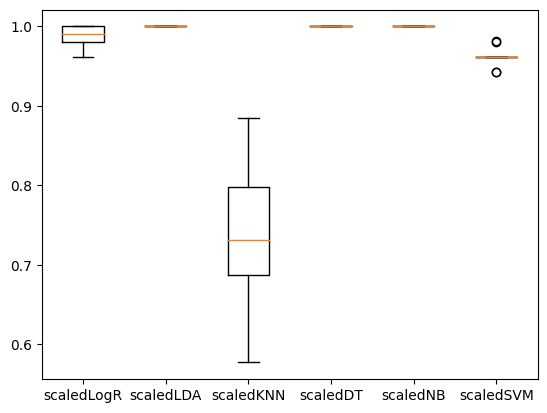

In [16]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.boxplot(results)

ax.set_xticklabels(names)

plt.show()

In [25]:
scaler = pp.StandardScaler().fit(Xtrain_fs)

rescale = scaler.transform(Xtrain_fs)

model = SVC(probability=True)

cvals = np.logspace(-2,4,100)

params = dict(C=cvals)

kfold = ms.KFold(n_splits=10)

metrics = ['accuracy', 'precision_weighted', 'recall_weighted']

grid = ms.GridSearchCV(model, param_grid=params, cv=kfold, scoring=metrics[0])



In [26]:
grid.fit(rescale, ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(probability=True),
             param_grid={'C': array([1.00000000e-02, 1.14975700e-02, 1.32194115e-02, 1.51991108e-02,
       1.74752840e-02, 2.00923300e-02, 2.31012970e-02, 2.65608778e-02,
       3.05385551e-02, 3.51119173e-02, 4.03701726e-02, 4.64158883e-02,
       5.33669923e-02, 6.13590727e-02, 7.05480231e-02, 8.1...
       4.03701726e+02, 4.64158883e+02, 5.33669923e+02, 6.13590727e+02,
       7.05480231e+02, 8.11130831e+02, 9.32603347e+02, 1.07226722e+03,
       1.23284674e+03, 1.41747416e+03, 1.62975083e+03, 1.87381742e+03,
       2.15443469e+03, 2.47707636e+03, 2.84803587e+03, 3.27454916e+03,
       3.76493581e+03, 4.32876128e+03, 4.97702356e+03, 5.72236766e+03,
       6.57933225e+03, 7.56463328e+03, 8.69749003e+03, 1.00000000e+04])},
             scoring='accuracy')

In [27]:
resacle_xtest = scaler.transform(Xtest_fs)

In [28]:
ypred = grid.predict(resacle_xtest)

In [29]:
mt.confusion_matrix(ytest, ypred)

array([[104,   1],
       [  0,  69]], dtype=int64)

In [32]:
print(mt.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       105
           2       0.99      1.00      0.99        69

    accuracy                           0.99       174
   macro avg       0.99      1.00      0.99       174
weighted avg       0.99      0.99      0.99       174



In [33]:
prob = grid.predict_proba(resacle_xtest)

In [36]:
fpr, tpr, th = mt.roc_curve(ytest, prob[:, 1], pos_label=2)

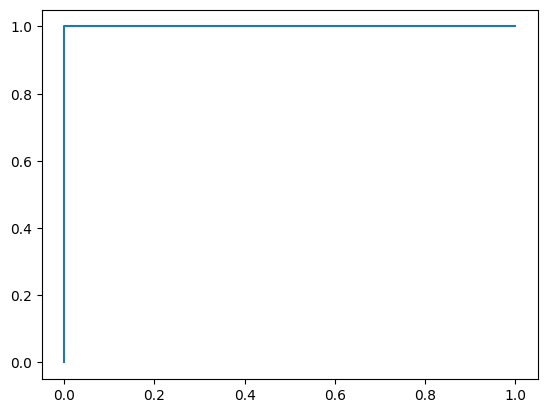

In [37]:
plt.plot(fpr, tpr)
plt.show()

In [25]:
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler',pp.StandardScaler()),('AB',AdaBoostClassifier())])))
ensembles.append(('ScaledG',Pipeline([('Scaler',pp.StandardScaler()),('Gradient',GradientBoostingClassifier())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',pp.StandardScaler()),('RF',RandomForestClassifier())])))
ensembles.append(('ScaledET',Pipeline([('Scaler',pp.StandardScaler()),('ET',ExtraTreesClassifier())])))

In [26]:
results = []
names = []

for name, model in ensembles:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model, Xtrain, ytrain, cv=kfold,
                                  scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_result.mean(), cv_result.std()))

ScaledAB: 1.000000 (0.000000)
ScaledG: 1.000000 (0.000000)
ScaledRF: 1.000000 (0.000000)
ScaledET: 1.000000 (0.000000)
